Fonte:

https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


<Axes: >

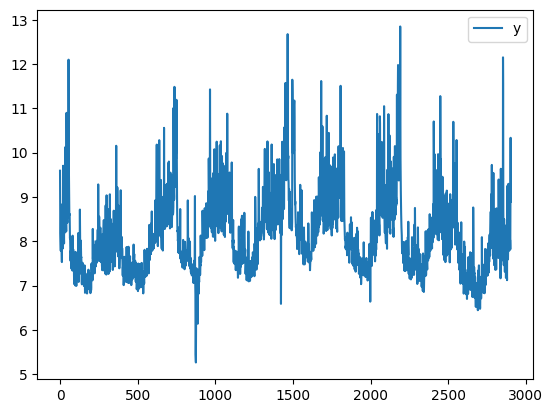

In [3]:
df.plot()

In [4]:
def nfl_sunday(ds):
    date = pd.to_datetime(ds)
    if date.weekday() == 6 and (date.month > 8 or date.month < 2):
        return 1
    else:
        return 0
df['nfl_sunday'] = df['ds'].apply(nfl_sunday)
df

,ds,y,nfl_sunday
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,0
2,2007-12-12,8.183677,0
3,2007-12-13,8.072467,0
4,2007-12-14,7.893572,0
...,...,...,...
2900,2016-01-16,7.817223,0
2901,2016-01-17,9.273878,1
2902,2016-01-18,10.333775,0
2903,2016-01-19,9.125871,0


In [6]:
df[df['nfl_sunday'] != 0]

,ds,y,nfl_sunday
6,2007-12-16,8.414052,1
13,2007-12-23,8.385261,1
20,2007-12-30,9.703145,1
27,2008-01-06,9.509259,1
34,2008-01-13,9.996522,1
...,...,...,...
2873,2015-12-20,7.891331,1
2880,2015-12-27,8.878776,1
2887,2016-01-03,8.249314,1
2894,2016-01-10,8.281724,1


In [8]:
m = Prophet()
m.add_regressor('nfl_sunday')
m.fit(df)

15:56:50 - cmdstanpy - INFO - Chain [1] start processing
15:56:50 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
m.train_holiday_names

In [12]:
future = m.make_future_dataframe(periods=365)
future['nfl_sunday'] = future['ds'].apply(nfl_sunday)
future

,ds,nfl_sunday
0,2007-12-10,0
1,2007-12-11,0
2,2007-12-12,0
3,2007-12-13,0
4,2007-12-14,0
...,...,...
3265,2017-01-15,1
3266,2017-01-16,0
3267,2017-01-17,0
3268,2017-01-18,0


In [13]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.009664,8.185061,9.407610,8.009664,8.009664,0.791945,0.791945,0.791945,0.000000,...,0.379093,0.379093,0.379093,0.412852,0.412852,0.412852,0.0,0.0,0.0,8.801609
1,2007-12-11,8.008128,7.927206,9.157321,8.008128,8.008128,0.542225,0.542225,0.542225,0.000000,...,0.146368,0.146368,0.146368,0.395857,0.395857,0.395857,0.0,0.0,0.0,8.550353
2,2007-12-12,8.006592,7.698084,8.979111,8.006592,8.006592,0.339601,0.339601,0.339601,0.000000,...,-0.040246,-0.040246,-0.040246,0.379847,0.379847,0.379847,0.0,0.0,0.0,8.346193
3,2007-12-13,8.005056,7.701074,8.888427,8.005056,8.005056,0.319500,0.319500,0.319500,0.000000,...,-0.045759,-0.045759,-0.045759,0.365258,0.365258,0.365258,0.0,0.0,0.0,8.324556
4,2007-12-14,8.003520,7.701277,8.963897,8.003520,8.003520,0.309276,0.309276,0.309276,0.000000,...,-0.043212,-0.043212,-0.043212,0.352488,0.352488,0.352488,0.0,0.0,0.0,8.312796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.159795,7.661458,9.127388,6.792449,7.521283,1.259720,1.259720,1.259720,0.441359,...,-0.110963,-0.110963,-0.110963,0.929324,0.929324,0.929324,0.0,0.0,0.0,8.419515
3266,2017-01-16,7.158763,7.730512,9.227181,6.789867,7.521990,1.331189,1.331189,1.331189,0.000000,...,0.379093,0.379093,0.379093,0.952096,0.952096,0.952096,0.0,0.0,0.0,8.489953
3267,2017-01-17,7.157732,7.543373,8.914585,6.787331,7.522798,1.120525,1.120525,1.120525,0.000000,...,0.146368,0.146368,0.146368,0.974157,0.974157,0.974157,0.0,0.0,0.0,8.278257
3268,2017-01-18,7.156701,7.396238,8.772565,6.784832,7.523605,0.955066,0.955066,0.955066,0.000000,...,-0.040246,-0.040246,-0.040246,0.995312,0.995312,0.995312,0.0,0.0,0.0,8.111767


In [14]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'extra_regressors_additive', 'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'nfl_sunday', 'nfl_sunday_lower',
       'nfl_sunday_upper', 'weekly', 'weekly_lower', 'weekly_upper', 'yearly',
       'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

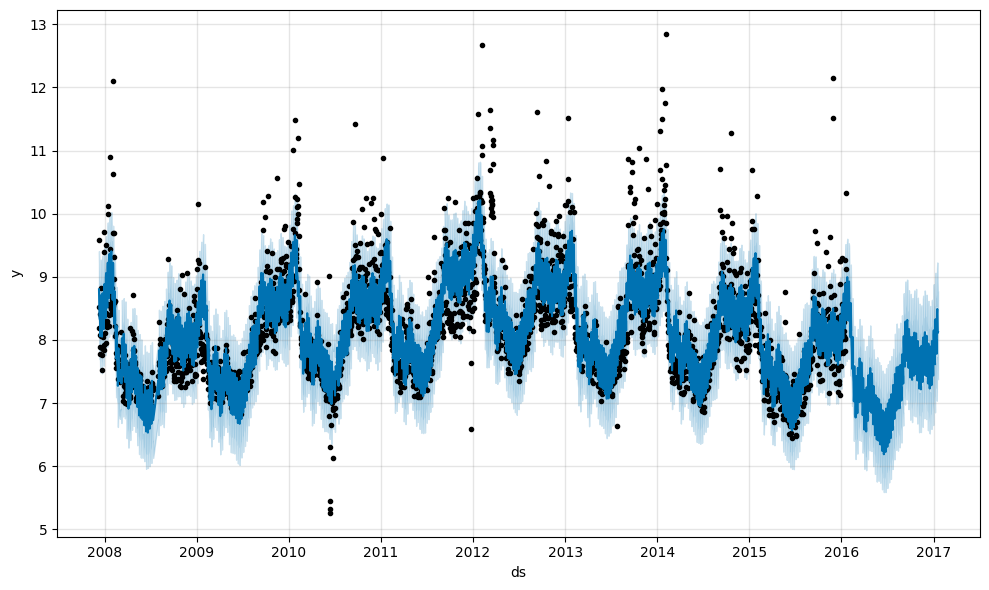

In [15]:
fig1 = m.plot(forecast)

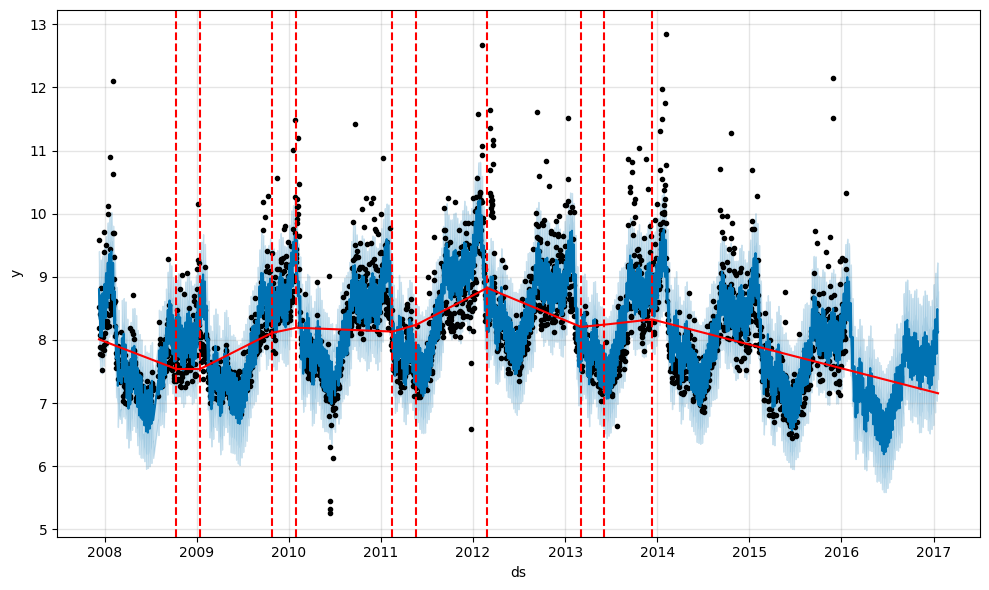

In [16]:
fig_cp = m.plot(forecast)
a = add_changepoints_to_plot(fig_cp.gca(), m, forecast)

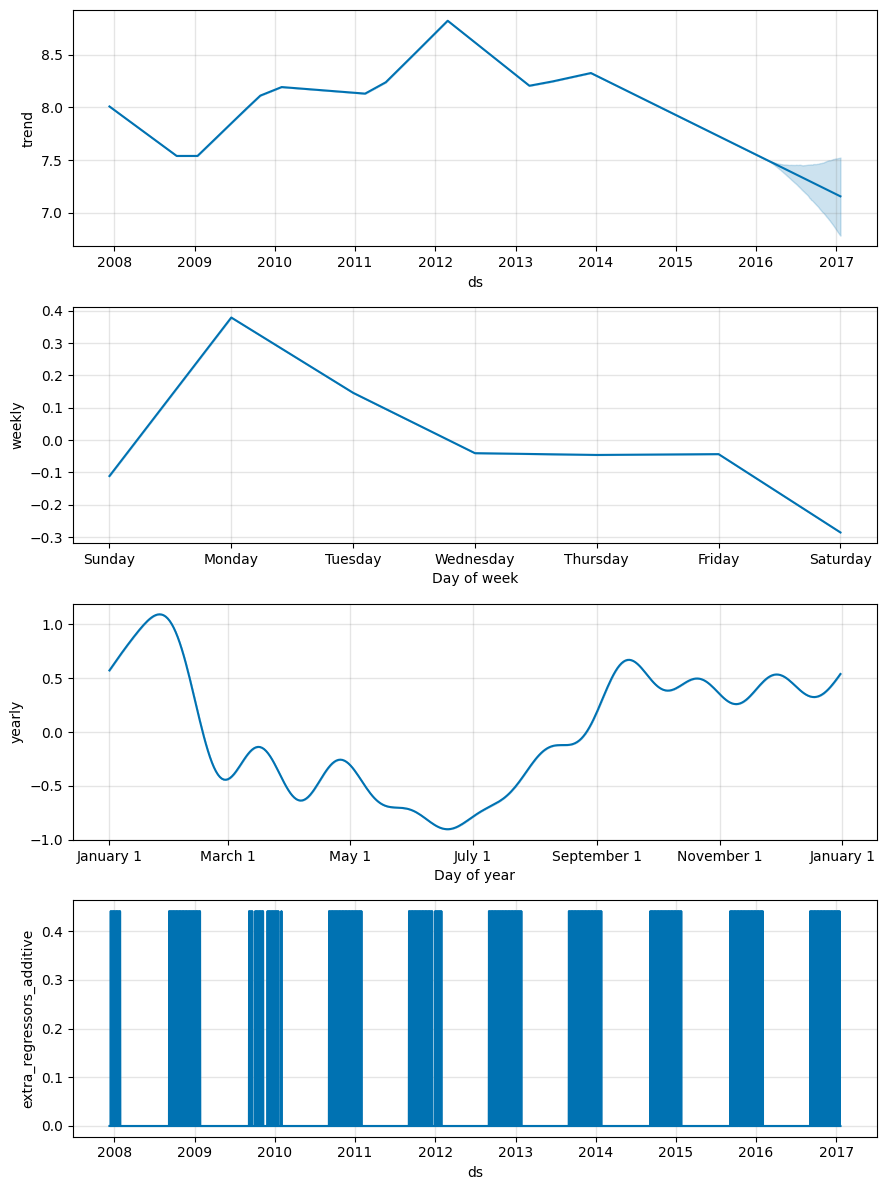

In [17]:
fig2 = m.plot_components(forecast)